<a href="https://colab.research.google.com/github/nex8928/kalvium-data-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lok Sabha election 2024

## Kalvium Data Analyst

In [ ]:
# import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import matplotlib.style
%matplotlib inline
import geopandas as gpd
from scipy.stats import describe
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')


### Data loading

In [ ]:
# load phase data

phases_load=['Phase1','Phase2','Phase3','Phase4','Phase5','Phase6','Phase7']
phases=pd.concat(pd.read_excel('/content/DataSet/phase_data.xlsx',sheet_name=phases_load), ignore_index=True)

# load General Election data

data=pd.read_excel('/content/DataSet/GE India 2024.xlsx',sheet_name='Final Result')
sheet_load=['Final Result','Counted vs polled','Victory Margins']
data=pd.concat(pd.read_excel('/content/DataSet/GE India 2024.xlsx',sheet_name=sheet_load),ignore_index=True)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.N                   8902 non-null   float64
 1   Candidate             8902 non-null   object 
 2   Party                 8902 non-null   object 
 3   EVM Votes             8902 non-null   object 
 4   Postal Votes          8902 non-null   object 
 5   Total Votes           8902 non-null   object 
 6   % of Votes            8902 non-null   object 
 7   State                 9445 non-null   object 
 8   Constituency          9445 non-null   object 
 9   Victory Margin        1084 non-null   float64
 10  PC Name               544 non-null    object 
 11  EVM Votes Counted     544 non-null    float64
 12  Postal Votes Counted  544 non-null    float64
 13  EVM Votes Polled      544 non-null    float64
 14  Difference            544 non-null    float64
 15  Margin               

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preprocessing

In [ ]:
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'],errors='coerce')
data['Postal Votes'] = pd.to_numeric(data['Postal Votes'],errors='coerce')
data['Total Votes'] = pd.to_numeric(data['Total Votes'],errors='coerce')
data['% of Votes'] = pd.to_numeric(data['% of Votes'].str.replace('%',''),errors='coerce')

In [ ]:
data['EVM Votes'].fillna(data['EVM Votes'].median(),inplace=True)
data['Postal Votes'].fillna(0,inplace=True)
data['Total Votes'].fillna(data['Total Votes'].median(),inplace=True)

In [ ]:
data.head(10)

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911.0,3.0,914.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714.0,5.0,719.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,RINKU MALA MONDAL,Independent,539.0,3.0,542.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,K VENKAT RAM BABU,Independent,506.0,1.0,507.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,USHA KUMARI,Independent,378.0,2.0,380.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
v_margin=data['Victory Margin']
per_of_votes=data['% of Votes']

data.drop(columns=['Victory Margin','% of Votes'], inplace=True)

In [ ]:
data.isnull().sum()

S.N                     1087
Candidate               1087
Party                   1087
EVM Votes                  0
Postal Votes               0
Total Votes                0
State                    544
Constituency             544
PC Name                 9445
EVM Votes Counted       9445
Postal Votes Counted    9445
EVM Votes Polled        9445
Difference              9445
Margin                  9447
Difference > Margin     9446
Postalvotes > Margin    9447
dtype: int64

### Exploratory Data Analysis

In [ ]:
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['S.N', 'EVM Votes', 'Postal Votes', 'Total Votes', 'EVM Votes Counted', 'Postal Votes Counted', 'EVM Votes Polled', 'Difference', 'Margin', 'Difference > Margin', 'Postalvotes > Margin']
Categorical variables: ['Candidate', 'Party', 'State', 'Constituency', 'PC Name']


In [ ]:
# Count the number of categorical and numerical variables
categorical_count = data.select_dtypes(include='object').shape[1]
numerical_count = data.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 5
Number of numerical variables: 11


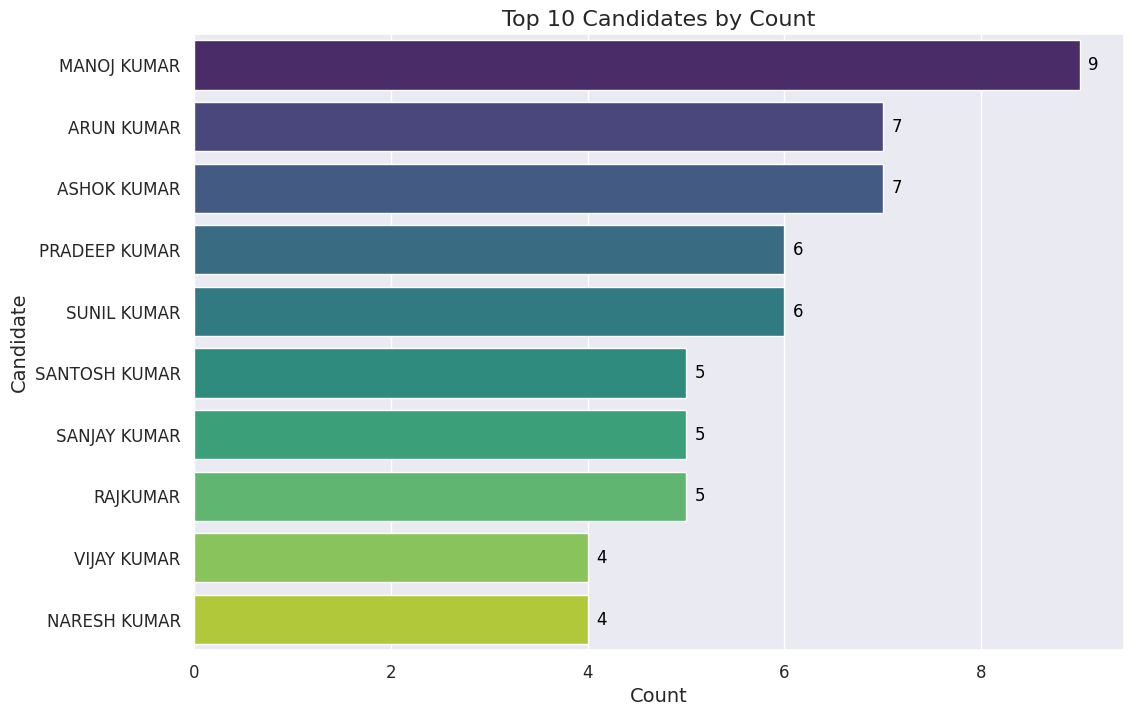

In [ ]:
candidate_counts = data[data['Candidate'] != 'NOTA']['Candidate'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=candidate_counts[:10], y=candidate_counts[:10].index, palette='viridis')
plt.title('Top 10 Candidates by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = candidate_counts[:10].max()
for i, count in enumerate(candidate_counts[:10]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

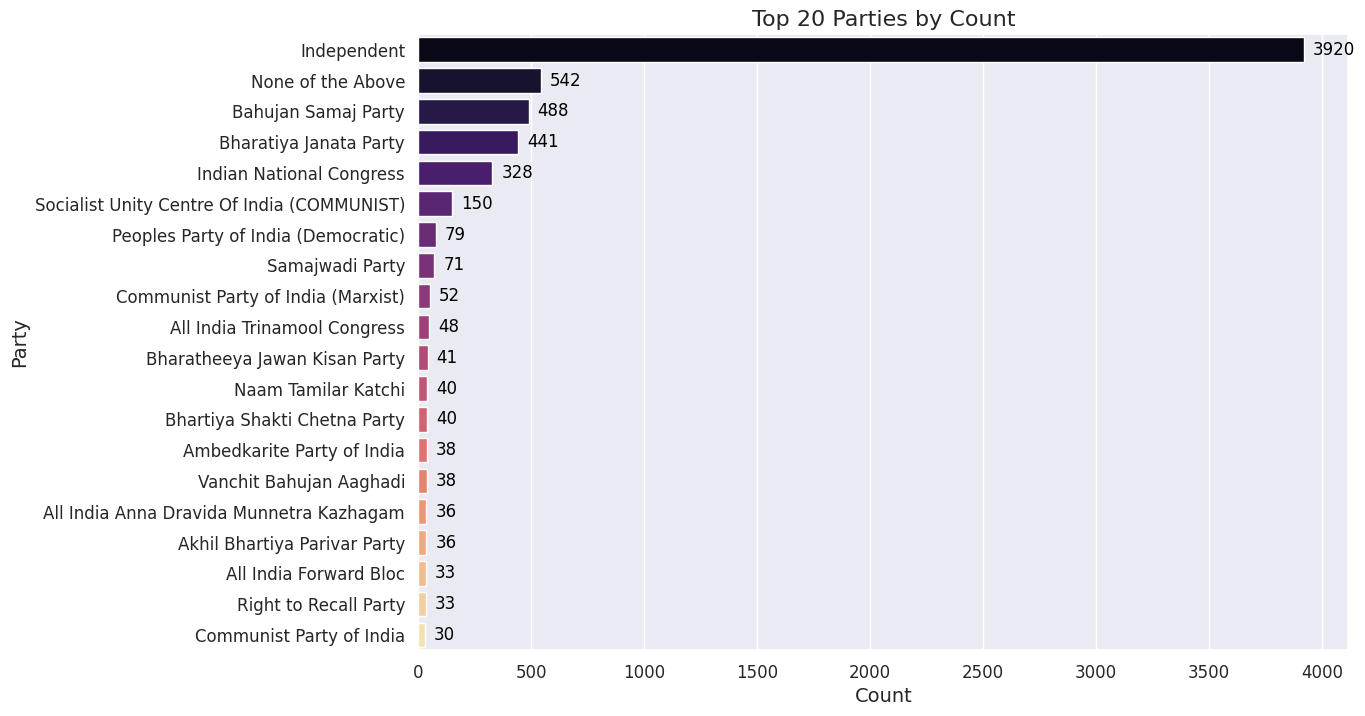

In [ ]:
party_counts = data['Party'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=party_counts[:20], y=party_counts[:20].index, palette='magma')
plt.title('Top 20 Parties by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Party', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = party_counts[:20].max()
for i, count in enumerate(party_counts[:20]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

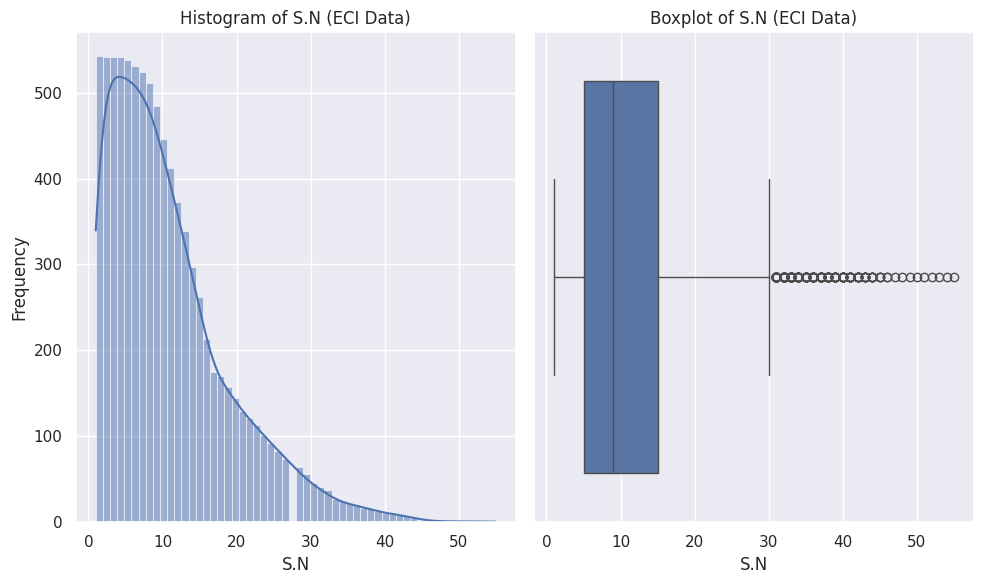

ECI Data - S.N: Skewness = 1.2690412586835371, Kurtosis = 1.7060143805667778


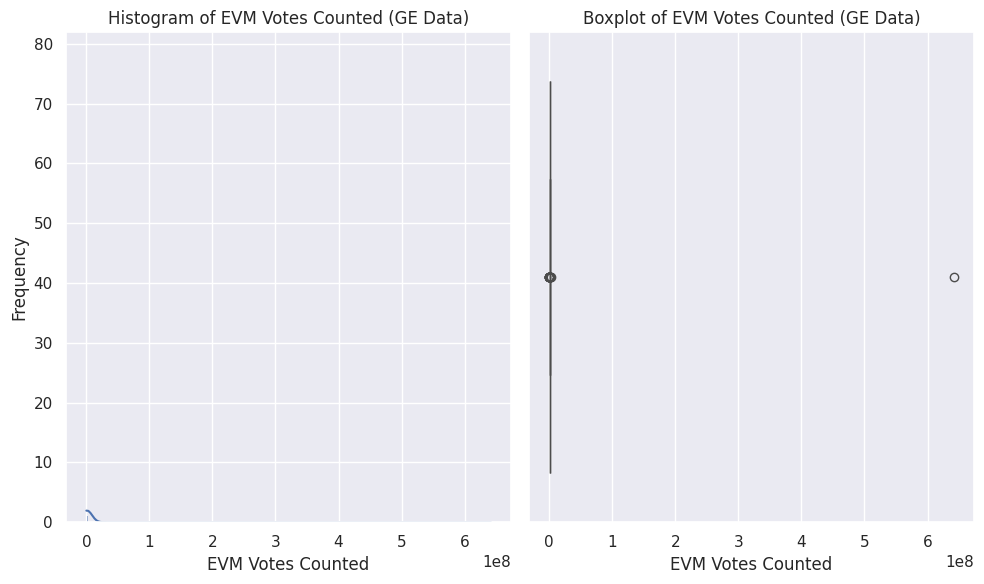

GE Data - EVM Votes Counted: Skewness = 23.2565726648374, Kurtosis = 538.9129070353644


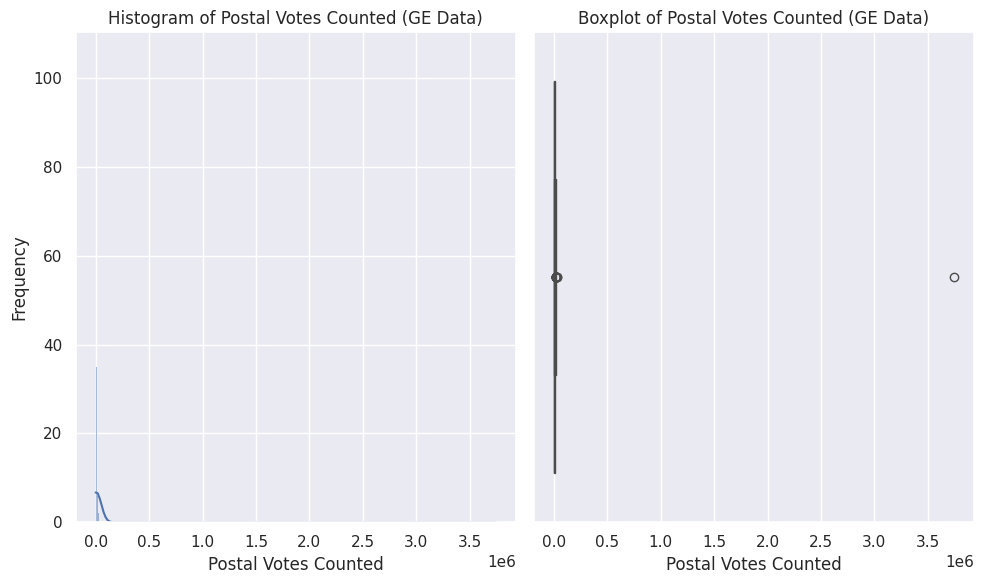

GE Data - Postal Votes Counted: Skewness = 23.22465193938857, Kurtosis = 537.9237158859311


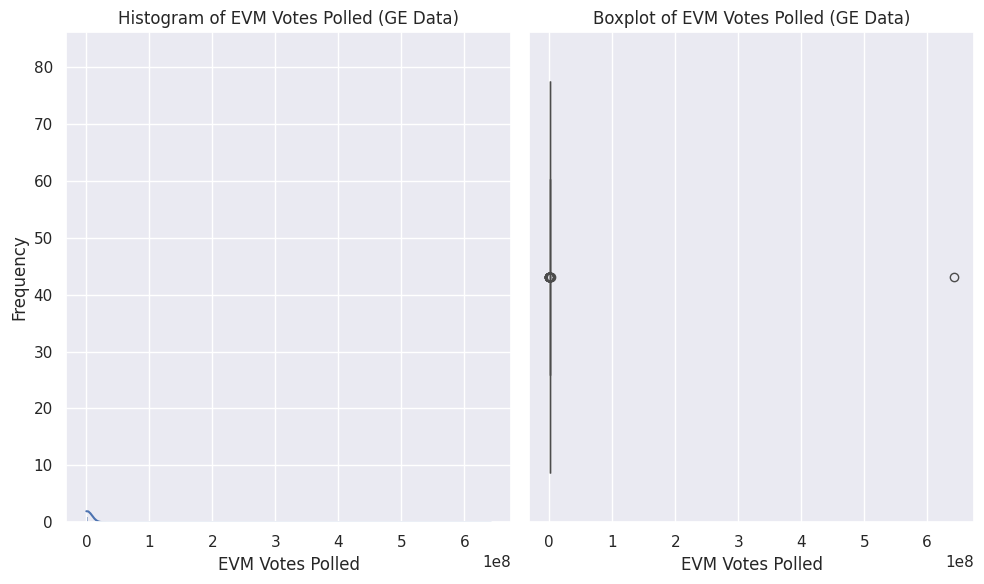

GE Data - EVM Votes Polled: Skewness = 23.256571289676096, Kurtosis = 538.912864384417


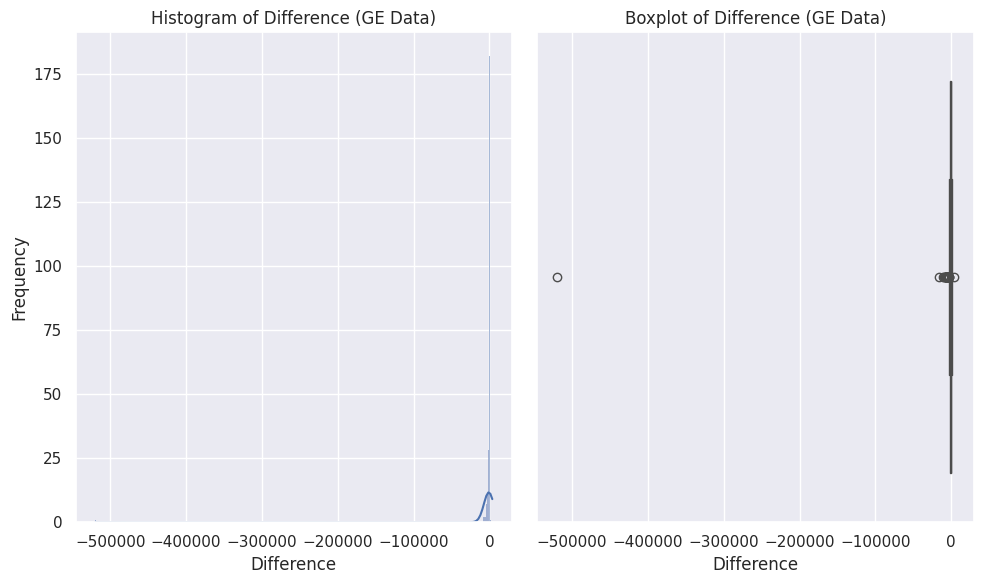

GE Data - Difference: Skewness = -23.051498054157605, Kurtosis = 532.5301663804062


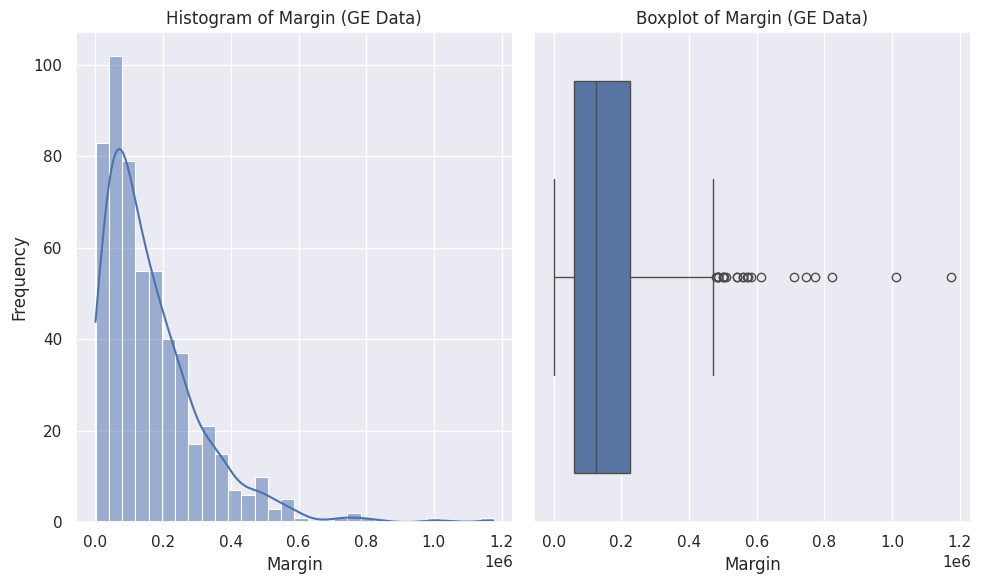

GE Data - Margin: Skewness = 2.067650216854479, Kurtosis = 7.1950657066221595


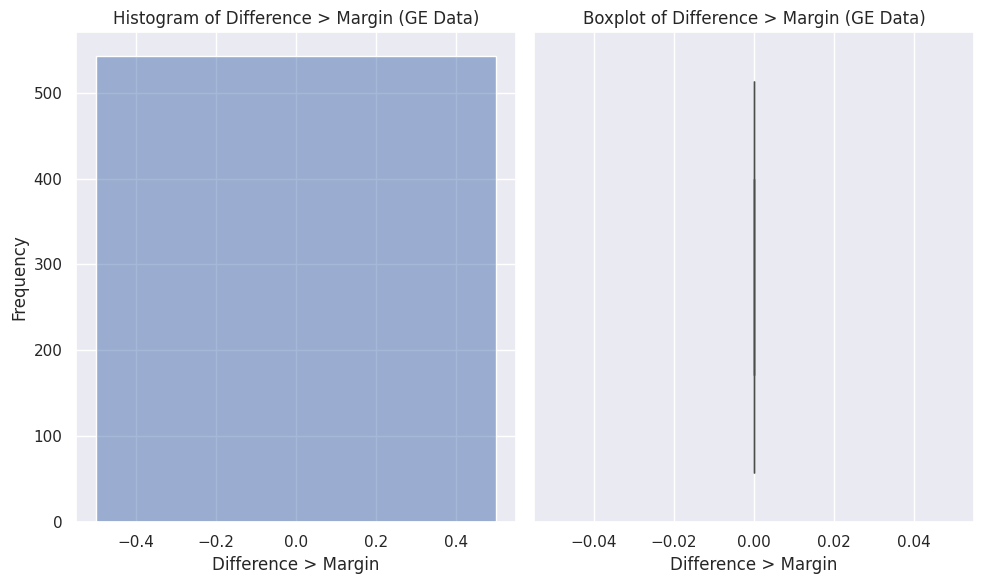

GE Data - Difference > Margin: Skewness = nan, Kurtosis = nan


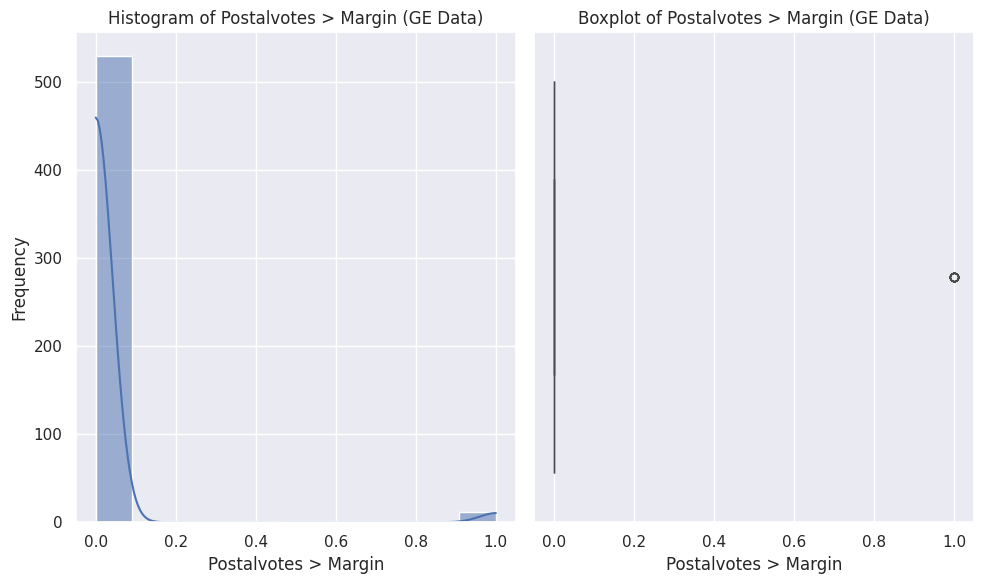

GE Data - Postalvotes > Margin: Skewness = 6.4953297203529745, Kurtosis = 40.18930817610064


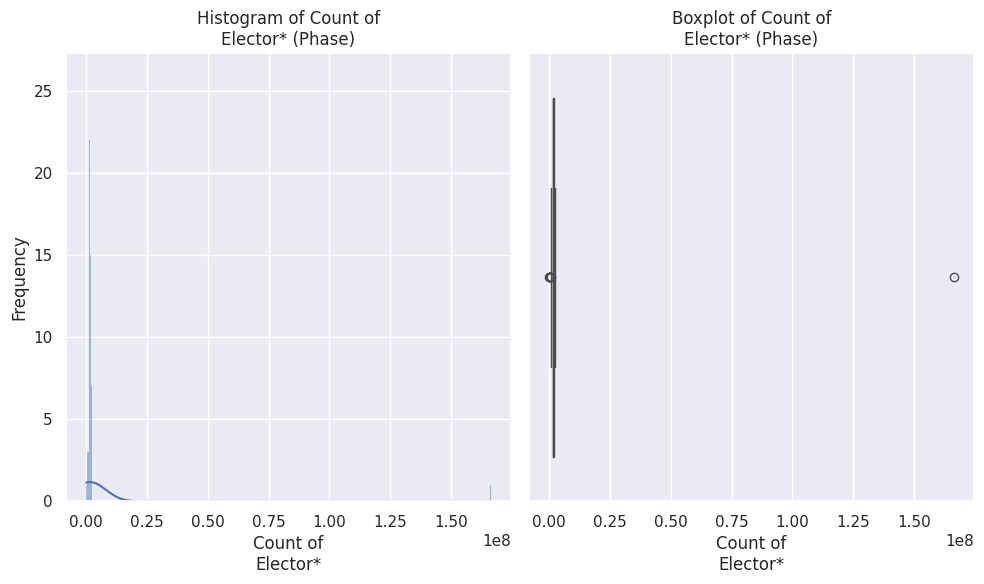

Phase - Count of
Elector*: Skewness = 9.98964427979966, Kurtosis = 97.86698570093387


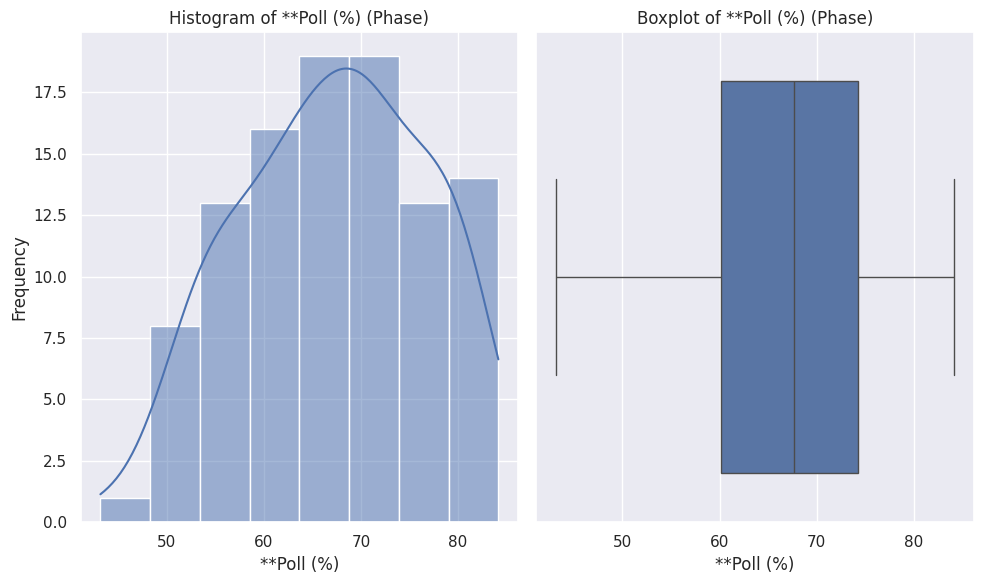

Phase - **Poll (%): Skewness = -0.1899984219387674, Kurtosis = -0.8226869740106468


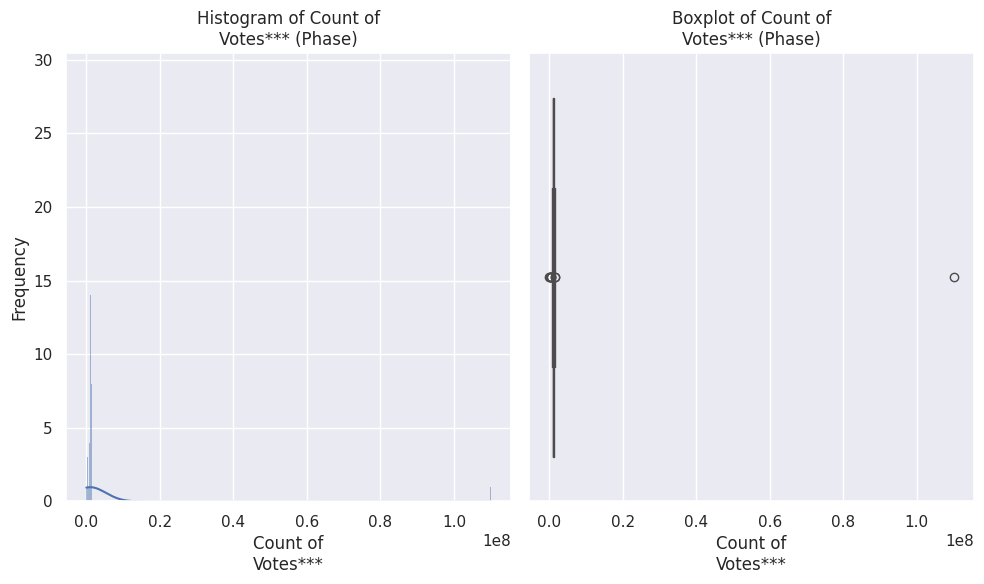

Phase - Count of
Votes***: Skewness = 9.98993971718611, Kurtosis = 97.870849217738


In [ ]:
# distribution shape
def distribution_shape(df, title):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col} ({title})')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} ({title})')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

        # Skewness and Kurtosis
        col_skewness = skew(df[col].dropna())
        col_kurtosis = kurtosis(df[col].dropna())
        print(f'{title} - {col}: Skewness = {col_skewness}, Kurtosis = {col_kurtosis}')

# Call the function with the DataFrames
distribution_shape(pd.read_csv('/content/DataSet/eci_data_2024.csv', encoding='latin-1'), 'ECI Data')
distribution_shape(pd.read_excel('/content/DataSet/GE India 2024.xlsx'), 'GE Data')
distribution_shape(pd.read_excel('/content/DataSet/phase_data.xlsx'), 'Phase')


### Vote Turnout Analysis

In [ ]:
total_votes = data['Total Votes']
turnout_mean  = total_votes.mean()
turnout_median  = total_votes.median()
turnout_mode  = total_votes.mode()
turnout_std  = total_votes.std()
turnout_q1 =  total_votes.quantile(0.25)
turnout_q3 =  total_votes.quantile(0.75)
turnout_iqr = turnout_q3 - turnout_q1
turnout_skewness = total_votes.skew()
turnout_kurtosis = total_votes.kurtosis()

print("Voter Turnout Analysis:")
print("- Mean Turnout:", turnout_mean)
print("- Median Turnout:", turnout_median)
print("- Standard Deviation of Turnout:", turnout_std)
print("- 25th Percentile (Q1) Turnout:", turnout_q1)
print("- 75th Percentile (Q3) Turnout:", turnout_q3)
print("- Interquartile Range (IQR) of Turnout:", turnout_iqr)
print("- Skewness of Turnout:", turnout_skewness)
print("- Kurtosis of Turnout:", turnout_kurtosis)

Voter Turnout Analysis:
- Mean Turnout: 64910.31865051557
- Median Turnout: 2781.0
- Standard Deviation of Turnout: 171209.7274122261
- 25th Percentile (Q1) Turnout: 1224.0
- 75th Percentile (Q3) Turnout: 7919.0
- Interquartile Range (IQR) of Turnout: 6695.0
- Skewness of Turnout: 2.919495075860898
- Kurtosis of Turnout: 7.889421819798367


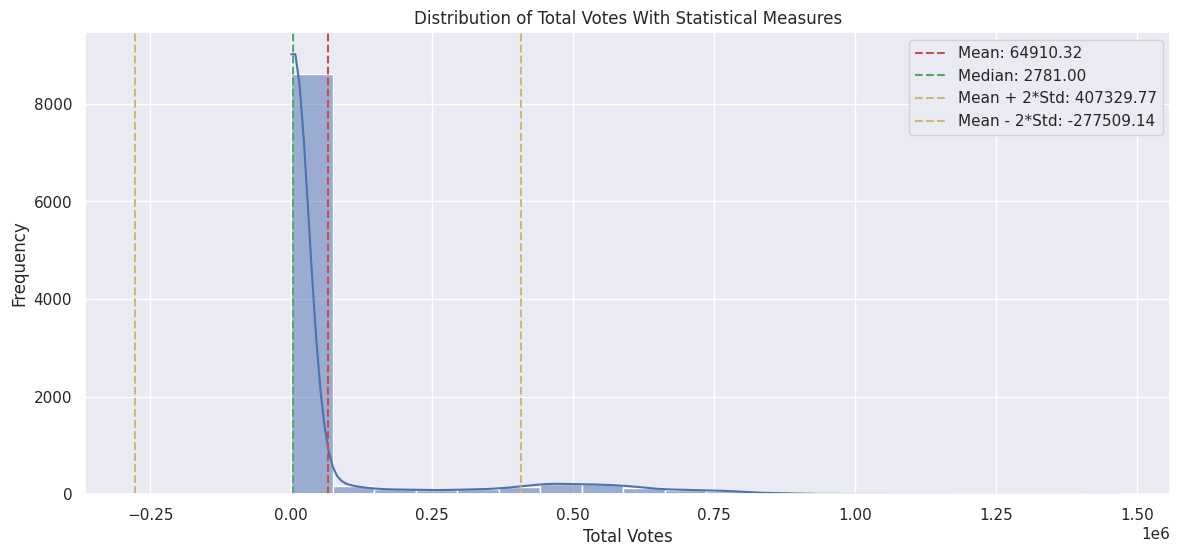

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(total_votes, bins=20, kde=True)
plt.axvline(turnout_mean, color='r', linestyle='--', label=f"Mean: {turnout_mean:.2f}")
plt.axvline(turnout_median, color='g', linestyle='--', label=f'Median: {turnout_median:.2f}')
plt.axvline(turnout_mean + 2*turnout_std, color='y', linestyle='--', label=f'Mean + 2*Std: {turnout_mean + 2*turnout_std:.2f}')
plt.axvline(turnout_mean - 2*turnout_std, color='y', linestyle='--', label=f'Mean - 2*Std: {turnout_mean - 2*turnout_std:.2f}')

plt.title('Distribution of Total Votes With Statistical Measures')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Vote Sharing

In [ ]:
data.replace('-', pd.NA, inplace=True)
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce')

data = data.dropna(subset=['Total Votes'])

data['Total Constituency Votes'] = data.groupby('Constituency')['Total Votes'].transform('sum')

# vote share as percentage for each candidate
data['Vote Share'] = (data['Total Votes'] / data['Total Constituency Votes']) * 100
party_vote_share = data.groupby('Party')['Vote Share'].sum().reset_index()
party_vote_share['Normalized Vote Share'] = (party_vote_share['Vote Share'] / party_vote_share['Vote Share'].sum()) * 100

top_parties = party_vote_share.sort_values(by='Normalized Vote Share', ascending=False).head(20)

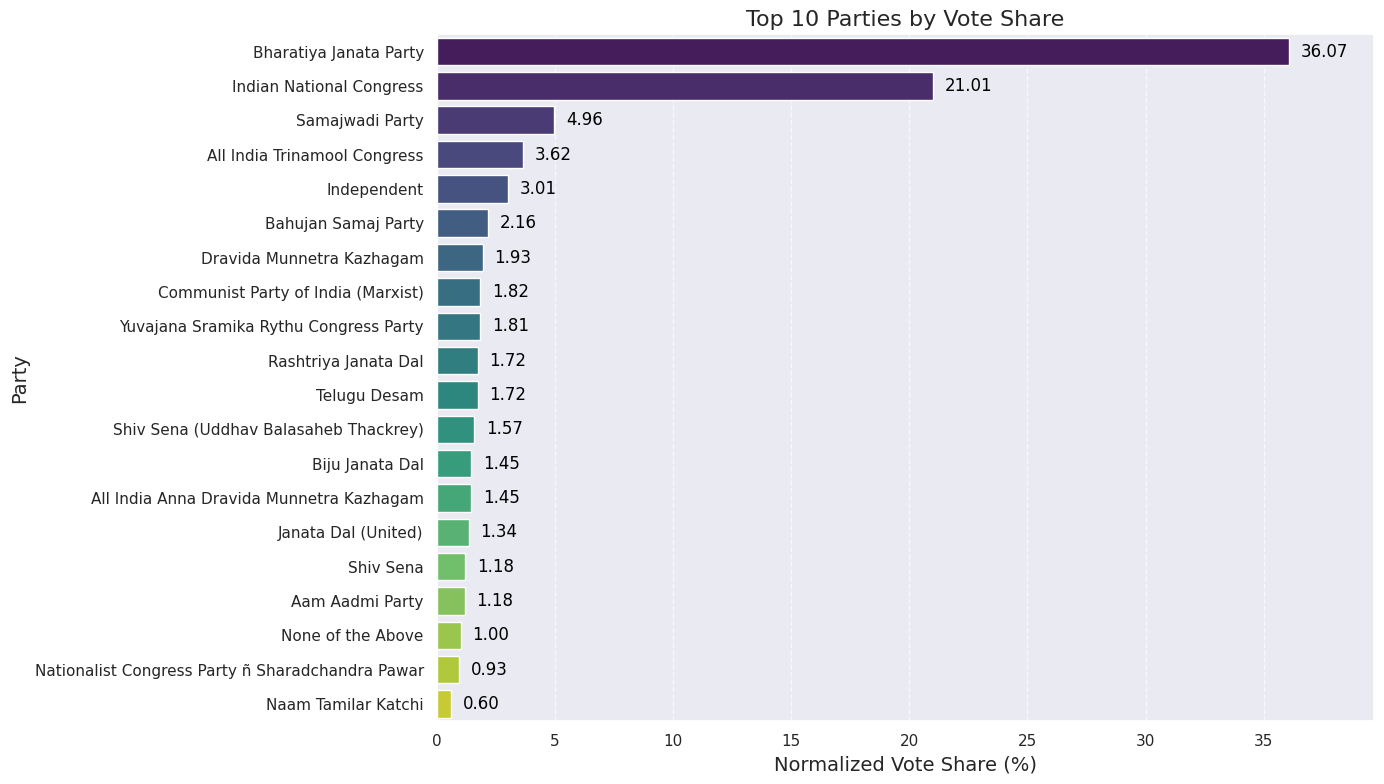

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_parties, x='Normalized Vote Share', y='Party', palette='viridis')

for i, v in enumerate(top_parties['Normalized Vote Share']):
    ax.text(v + 0.5, i, f"{v:.2f}", color='black', va='center')

plt.title('Top 10 Parties by Vote Share', fontsize=16)
plt.xlabel('Normalized Vote Share (%)', fontsize=14)
plt.ylabel('Party', fontsize=14)

plt.xlim(0, top_parties['Normalized Vote Share'].max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
data['EVM Z-Score'] = (data['EVM Votes'] - data['EVM Votes'].mean()) / data['EVM Votes'].std()
data['Postal Z-Score'] = (data['Postal Votes'] - data['Postal Votes'].mean()) / data['Postal Votes'].std()

# Flag anomalies with Z-score > 3 or < -3
data['EVM Anomaly'] = np.abs(data['EVM Z-Score']) > 3
data['Postal Anomaly'] = np.abs(data['Postal Z-Score']) > 3

evm_anomalies = data[data['EVM Anomaly']]
postal_anomalies = data[data['Postal Anomaly']]

print("\nEVM Vote Anomalies:\n", evm_anomalies[['Candidate', 'Constituency', 'EVM Votes', 'EVM Z-Score']])


EVM Vote Anomalies:
                              Candidate         Constituency  EVM Votes  \
13               G M HARISH (BALAYOGI)  Amalapuram (SC) - 7   786149.0   
29                          C.M.RAMESH       Anakapalle - 5   750027.0   
45    AMBICA G LAKSHMINARAYANA VALMIKI      Ananthapur - 19   755862.0   
81              KRISHNA PRASAD TENNETI    Bapatla (SC) - 15   706757.0   
97              DAGGUMALLA PRASADA RAO    Chittoor(SC) - 25   765536.0   
...                                ...                  ...        ...   
8860               MUKUT MANI ADHIKARI        Ranaghat - 13   592276.0   
8867                   KALYAN BANERJEE       Srerampur - 27   671865.0   
8879              ABHIJIT GANGOPADHYAY          Tamluk - 30   761183.0   
8880            DEBANGSHU BHATTACHARYA          Tamluk - 30   683955.0   
8889                       SAJDA AHMED        Uluberia - 26   722586.0   

      EVM Z-Score  
13       4.239023  
29       4.026829  
45       4.061106  
81       

In [ ]:
print("\nPostal Vote Anomalies:\n", postal_anomalies[['Candidate', 'Constituency', 'Postal Votes', 'Postal Z-Score']])


Postal Vote Anomalies:
                                    Candidate         Constituency  \
13                     G M HARISH (BALAYOGI)  Amalapuram (SC) - 7   
14                    RAPAKA VARAPRASADA RAO  Amalapuram (SC) - 7   
29                                C.M.RAMESH       Anakapalle - 5   
30                        BUDI MUTYALA NAIDU       Anakapalle - 5   
45          AMBICA G LAKSHMINARAYANA VALMIKI      Ananthapur - 19   
...                                      ...                  ...   
8700                       ADHIKARI SOUMENDU          Kanthi - 31   
8701  UTTAM BARIK SON OF LATE BIRENDRA BARIK          Kanthi - 31   
8745                              AMRITA ROY    Krishnanagar - 12   
8859                        JAGANNATH SARKAR        Ranaghat - 13   
8879                    ABHIJIT GANGOPADHYAY          Tamluk - 30   

      Postal Votes  Postal Z-Score  
13         10832.0        8.225026  
14          4423.0        3.184049  
29         12042.0        9.176748 

### EVM and Postal Voting Analysis

In [ ]:
data = data[data['Postal Votes'] > 0]
evm_votes_mean = data['EVM Votes'].mean()
postal_votes_mean = data['Postal Votes'].mean()

print("Number of negative or zero EVM Votes:", (data['EVM Votes'] <= 0).sum())
print("Number of negative or zero Postal Votes:", (data['Postal Votes'] <= 0).sum())

Number of negative or zero EVM Votes: 0
Number of negative or zero Postal Votes: 0


In [ ]:
data['EVM Votes'].value_counts().sum()

8324

In [ ]:
data['Postal Votes'].value_counts().sum()

8324

Correlation Between EVM Votes and Postal Votes: 0.7636279409286912


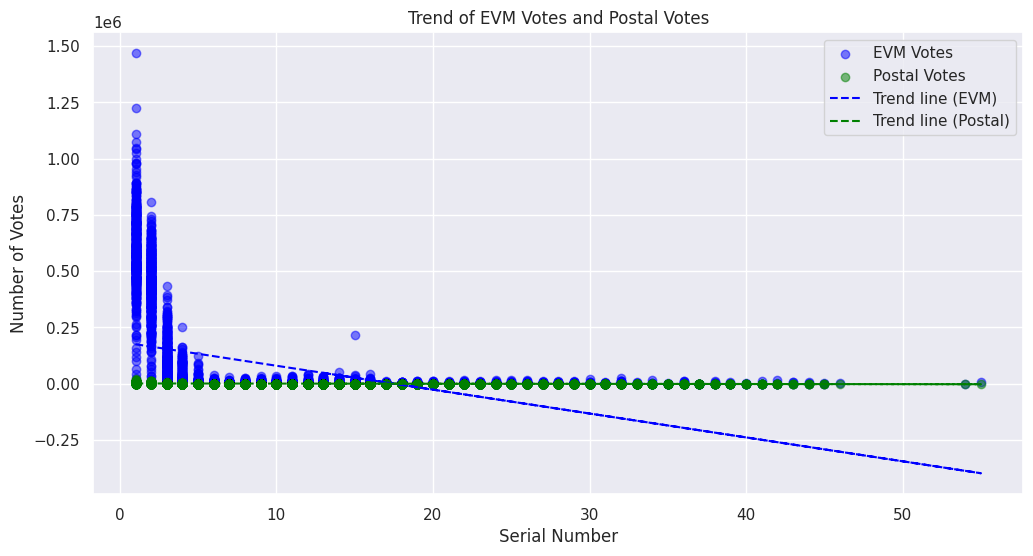

In [ ]:
X = data['S.N'].values.reshape(-1,1)
y_evm = data['EVM Votes'].values.reshape(-1,1)
y_postal = data['Postal Votes'].values.reshape(-1,1)

model_evm = LinearRegression().fit(X, y_evm)
model_postal = LinearRegression().fit(X, y_postal)

y_evm_predict = model_evm.predict(X)
y_postal_predict = model_postal.predict(X)

correlation, _ = pearsonr(data['EVM Votes'], data['Postal Votes'])
print("Correlation Between EVM Votes and Postal Votes:", correlation)


plt.figure(figsize=(12, 6))
plt.scatter(data['S.N'], data['EVM Votes'], label='EVM Votes', color='blue', alpha=0.5)
plt.scatter(data['S.N'], data['Postal Votes'], label='Postal Votes', color='green', alpha=0.5)
plt.plot(data['S.N'], y_evm_predict, color='blue', linestyle='--', label='Trend line (EVM)')
plt.plot(data['S.N'], y_postal_predict, color='green', linestyle='--', label='Trend line (Postal)')
plt.xlabel('Serial Number')
plt.ylabel('Number of Votes')
plt.title('Trend of EVM Votes and Postal Votes')
plt.legend()
plt.grid(True)
plt.show()

### Victory Margin

In [ ]:
victory_margins = pd.read_excel('/content/DataSet/GE India 2024.xlsx', sheet_name='Victory Margins')
merged_data = pd.merge(data, victory_margins, on='Constituency', how='left')

merged_data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,State,Constituency,PC Name,EVM Votes Counted,...,Margin,Difference > Margin,Postalvotes > Margin,Total Constituency Votes,Vote Share,EVM Z-Score,Postal Z-Score,EVM Anomaly,Postal Anomaly,Victory Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,50.582182,0.221157,-0.095065,False,False,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,38.535607,0.078099,-0.128886,False,False,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,4.075768,-0.330715,-0.280690,False,False,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,2.971153,-0.343798,-0.288555,False,False,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,1.087826,-0.366202,-0.288555,False,False,NaN


In [ ]:
victory_margins

,Constituency,Victory Margin
0,Adilabad,90652.0
1,Agra,271294.0
2,Ahmedabad East,461755.0
3,Ahmedabad West,286437.0
4,Ahmednagar,28929.0
...,...,...
538,Wardha,81648.0
539,Wayanad,364422.0
540,West Delhi,199013.0
541,Yavatmal- Washim,94473.0


In [ ]:
null_margins = victory_margins.isnull().sum()
# Showing only rows
null_rows = victory_margins.isnull()
null_rows.head()

,Constituency,Victory Margin
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


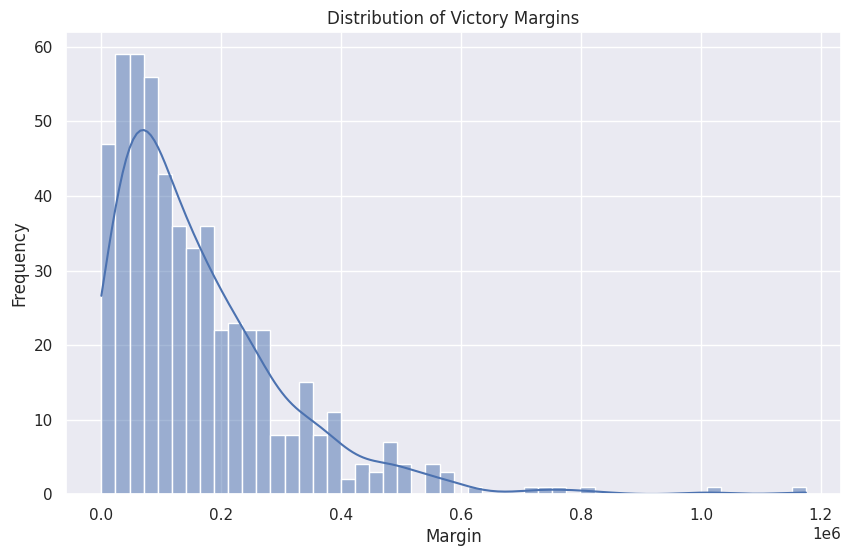

Top 10 PCs by Victory Margins:
         Constituency  Victory Margin
222           INDORE       1175092.0
155           Dhubri       1012476.0
531          VIDISHA        821408.0
383          Navsari        773551.0
182      Gandhinagar        744716.0
157  Diamond harbour        710930.0
513     Tripura West        611578.0
525         Vadodara        582126.0
426           RAIPUR        575285.0
509       TIRUVALLUR        572155.0
Bottom 10 PCs by Victory Margins:
           Constituency  Victory Margin
357  Mumbai North West            48.0
40            Attingal           684.0
229       JAIPUR RURAL          1615.0
264             KANKER          1884.0
116         Chandigarh          2504.0
205           Hamirpur          2629.0
312        Lakshadweep          2647.0
175        Farrukhabad          2678.0
62            Bansgaon          3150.0
180           Firozpur          3242.0


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(victory_margins['Victory Margin'], bins=50, kde=True)
plt.title('Distribution of Victory Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

top_10_margins = victory_margins.nlargest(10, 'Victory Margin')
bottom_10_margins = victory_margins.nsmallest(10, 'Victory Margin')

print("Top 10 PCs by Victory Margins:\n", top_10_margins[['Constituency', 'Victory Margin']])
print("Bottom 10 PCs by Victory Margins:\n", bottom_10_margins[['Constituency', 'Victory Margin']])

In [ ]:
numeric_columns = ['Count of\nElector*', '**Poll (%)', 'Count of\nVotes***', 'Count of Elector*', '**Poll\n(%)', 'Count of Votes***']
data_imputed = phases.copy()

for col in numeric_columns:
    if data_imputed[col].dtype in ['float64', 'int64']:  # Check if the column is numeric
        mean_val = data_imputed[col].mean()
        data_imputed[col].fillna(mean_val, inplace=True)

In [ ]:
data_imputed.dropna(subset=['State', 'PC Name'], how='all', inplace=True)
print(data_imputed.isnull().sum())

Sl. No.               0
State                 0
PC Name               0
Count of\nElector*    0
**Poll (%)            0
Count of\nVotes***    0
Count of Elector*     0
**Poll\n(%)           0
Count of Votes***     0
dtype: int64


In [ ]:
data_imputed['Delta Electors'] = data_imputed['Count of\nElector*'].diff()
data_imputed['Delta Votes'] = data_imputed['Count of\nVotes***'].diff()
data_imputed['Delta Phase'] = data_imputed['Sl. No.'].diff()

data_imputed['Average Rate of Change (Electors)'] = data_imputed['Delta Electors'] / data_imputed['Delta Phase']
data_imputed['Average Rate of Change (Votes)'] = data_imputed['Delta Votes'] / data_imputed['Delta Phase']

data_imputed = data_imputed.dropna()

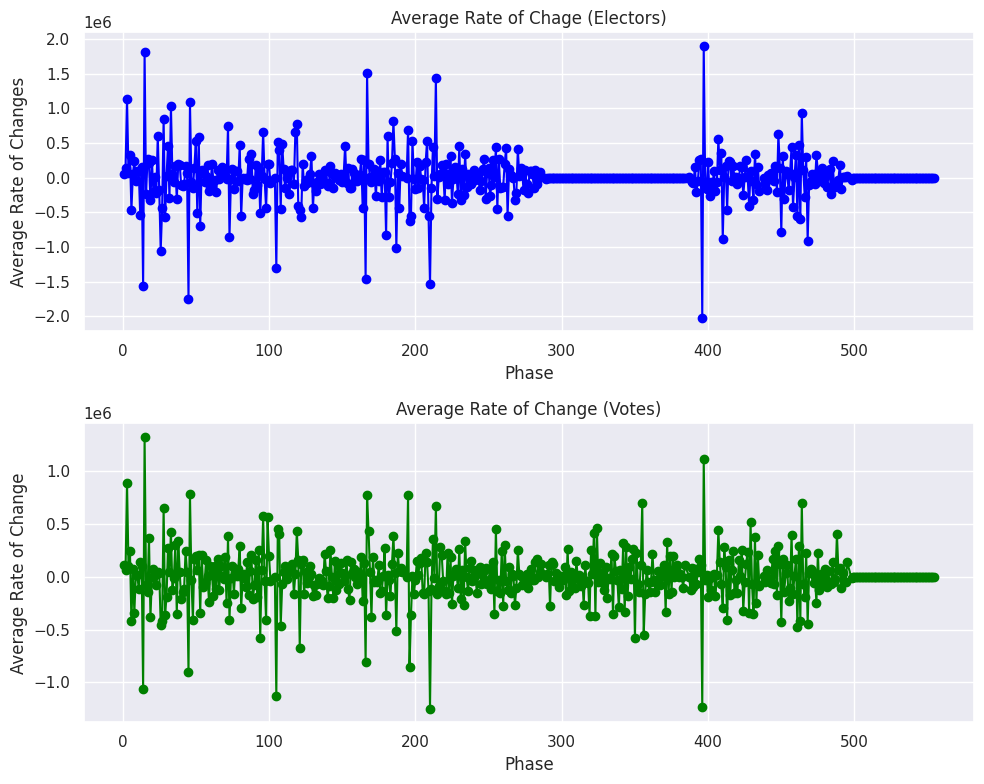

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(10,8))
axes[0].plot(data_imputed.index, data_imputed['Average Rate of Change (Electors)'], marker='o', color='blue')
axes[0].set_title('Average Rate of Chage (Electors)')
axes[0].set_xlabel('Phase')
axes[0].set_ylabel('Average Rate of Changes')

axes[1].plot(data_imputed.index, data_imputed['Average Rate of Change (Votes)'], marker='o', color='green')
axes[1].set_title('Average Rate of Change (Votes)')
axes[1].set_xlabel('Phase')
axes[1].set_ylabel('Average Rate of Change')

plt.tight_layout()
plt.show()

### Trend Analysis Over Phases

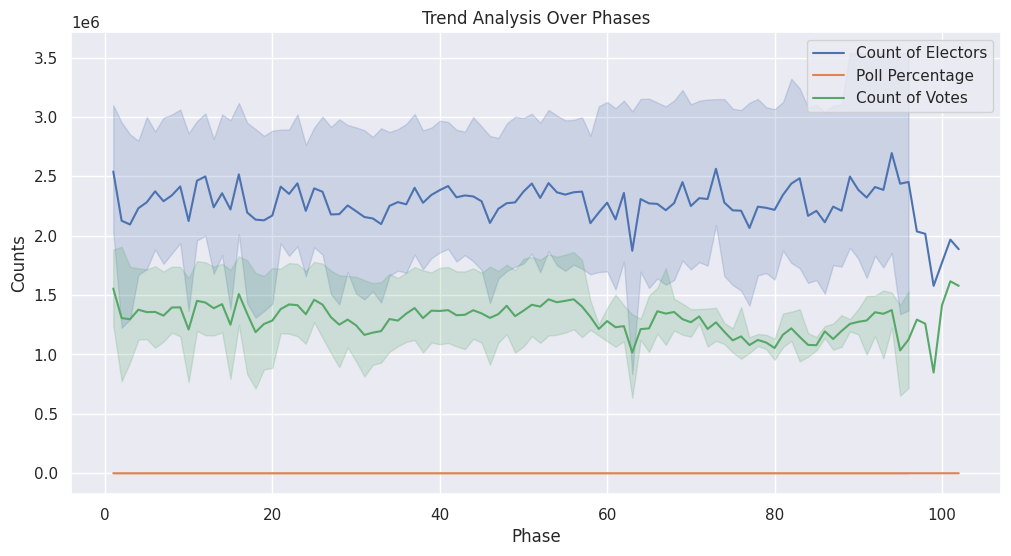

In [ ]:
numeric_cols = ['Count of\nElector*', '**Poll (%)', 'Count of\nVotes***', 'Count of Elector*', '**Poll\n(%)', 'Count of Votes***']
data_imputed[numeric_cols] = data_imputed[numeric_cols].apply(pd.to_numeric, errors='coerce')


plt.figure(figsize=(12, 6))
sns.lineplot(data=data_imputed, x='Sl. No.', y='Count of\nElector*', label='Count of Electors')
sns.lineplot(data=data_imputed, x='Sl. No.', y='**Poll (%)', label='Poll Percentage')
sns.lineplot(data=data_imputed, x='Sl. No.', y='Count of\nVotes***', label='Count of Votes')
plt.xlabel('Phase')
plt.ylabel('Counts')
plt.title('Trend Analysis Over Phases')
plt.legend()
plt.show()

### **Word Cloud of Candidates and Parties**

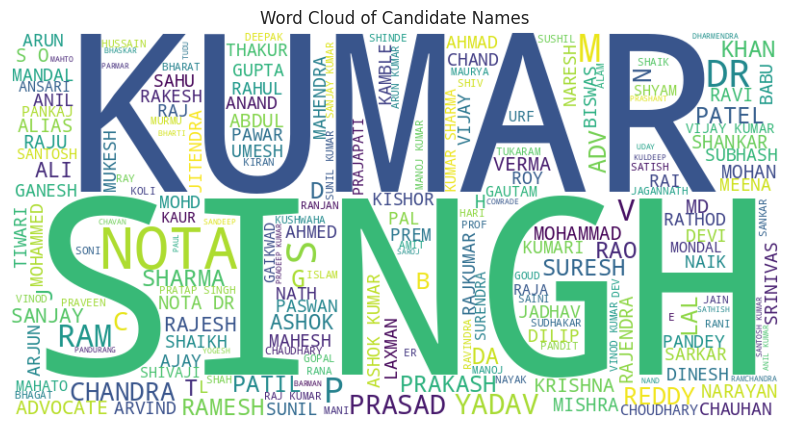

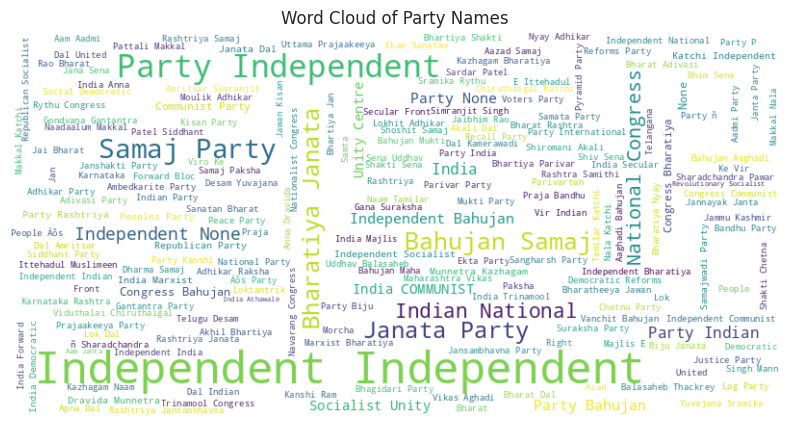

In [ ]:
from wordcloud import WordCloud

# Word cloud for candidate names
candidate_names = ' '.join(data['Candidate'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(candidate_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Candidate Names')
plt.axis('off')
plt.show()

# Word cloud for party names
party_names = ' '.join(data['Party'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(party_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Party Names')
plt.axis('off')
plt.show()


### **Predictive Analysis**

In [ ]:
eci_data = pd.read_csv('/content/DataSet/eci_data_2024.csv', encoding='ISO-8859-1')
ge_india_data = pd.read_excel('/content/DataSet/GE India 2024.xlsx')
phase_data = pd.read_excel('/content/DataSet/phase_data.xlsx')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare data
data = ge_india_data
try:
    features = data[['EVM Votes Counted', 'Postal Votes Counted', 'EVM Votes Polled']]
    target = (data['Margin'] > 0).astype(int)
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names.")
    raise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9817073170731707
Confusion Matrix:
 [[  0   1]
 [  2 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.99      0.99       163

    accuracy                           0.98       164
   macro avg       0.50      0.49      0.50       164
weighted avg       0.99      0.98      0.98       164

